In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
#2. Load the dataset

data = pd.read_csv("Mall_Customers.csv")
data = pd.DataFrame(data)
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
data.rename(columns = {"Annual Income (k$)" : "Annual_Income","Spending Score (1-100)": "Spending_Score"}, inplace=True)
new_data = data.iloc[:,1:]
new_data.head()

,Gender,Age,Annual_Income,Spending_Score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


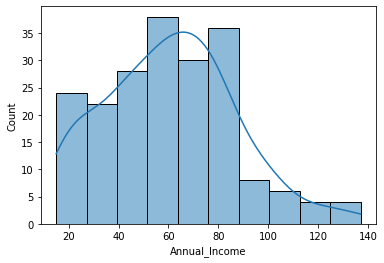

In [4]:
#3. Perform Visualizations.

#Univariate analysis

sns.histplot(data = new_data["Annual_Income"], kde=True)

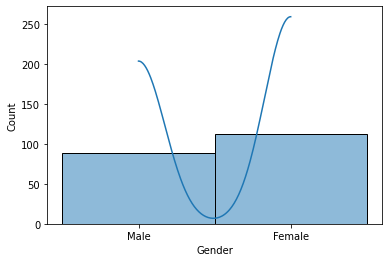

In [5]:
sns.histplot(data = new_data["Gender"], kde=True)

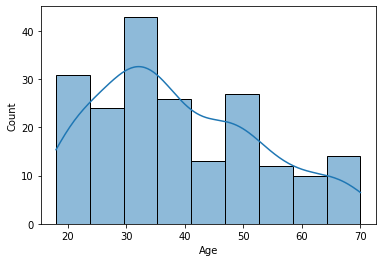

In [6]:
sns.histplot(data = new_data["Age"], kde=True)

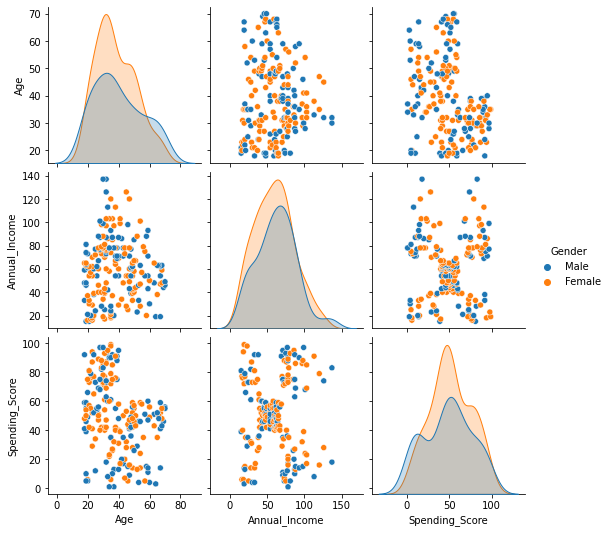

In [7]:
#multivariate analysis

sns.pairplot(data = new_data ,hue = "Gender")


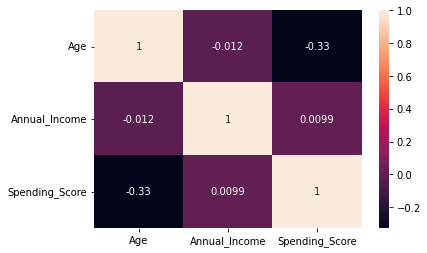

In [9]:
#cols_to_plot = data.columns[2:].tolist()
f = new_data.corr()
sns.heatmap(f, annot=True)

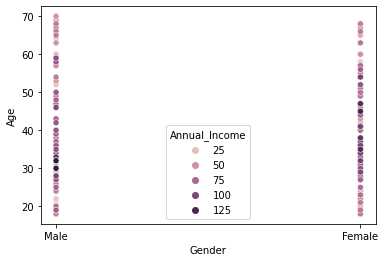

In [10]:
#bivariate analysis
sns.scatterplot(data = new_data, x="Gender", y = "Age", hue="Annual_Income")

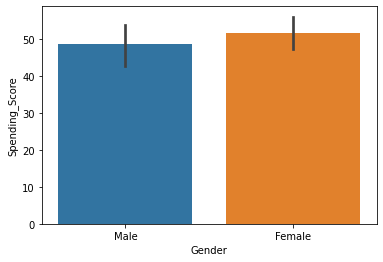

In [11]:
sns.barplot(data = data, x="Gender", y = "Spending_Score")

In [12]:
#4.perform descriptive statistics

new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Gender          200 non-null    object
 1   Age             200 non-null    int64 
 2   Annual_Income   200 non-null    int64 
 3   Spending_Score  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


In [13]:
new_data.Gender.value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

In [14]:
new_data.describe()

,Age,Annual_Income,Spending_Score
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [15]:
#5.check for missing values

new_data.isnull().sum()

Gender            0
Age               0
Annual_Income     0
Spending_Score    0
dtype: int64

In [16]:
#7.find outliers

def find_outliers_IQR(df):
  q1=df.quantile(0.25)
  q3=df.quantile(0.75)
  IQR=q3-q1
  outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]
  return outliers

def clear_outliers_IQR(df):
   q1=df.quantile(0.25)
   q3=df.quantile(0.75)
   IQR=q3-q1
   upper = df[~(df>(q3+1.5*IQR))].max()
   lower = df[~(df<(q1-1.5*IQR))].min()
   df = np.where(df > upper,df.mean(),np.where(df < lower,df.mean(),df))
   return df

columns = ["Age", "Spending_Score", "Annual_Income"]
for i in columns:
  outliers = find_outliers_IQR(data[i])
  print(f"number of outliers in {i}: "+ str(len(outliers)))

new_data["Annual_Income"] = clear_outliers_IQR(data["Annual_Income"])
outliers = find_outliers_IQR(new_data["Annual_Income"])
print("number of outliers: "+ str(len(outliers)))

number of outliers in Age: 0
number of outliers in Spending_Score: 0
number of outliers in Annual_Income: 2
number of outliers: 0


In [17]:
#7.check for categorical columns and perform encoding.
from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()
new_data["Gender"] = LE.fit_transform(new_data["Gender"])
new_data["Gender"].unique()

array([1, 0])

In [18]:
#8.Scaling the data.
from sklearn.preprocessing import scale
#data_copy = data[["Age", "Gender", "Annual_Income", "Spending_Score"]]
data_scaled = pd.DataFrame(scale(new_data),columns =["Gender","Age", "Annual_Income", "Spending_Score"] )
data_scaled.head()

,Gender,Age,Annual_Income,Spending_Score
0,1.128152,-1.424569,-1.788434,-0.434801
1,1.128152,-1.281035,-1.788434,1.195704
2,-0.886405,-1.352802,-1.748510,-1.715913
3,-0.886405,-1.137502,-1.748510,1.040418
4,-0.886405,-0.563369,-1.708586,-0.395980


In [20]:
#9.Perform any of the clustering algorithms.

from sklearn.cluster import KMeans 

error = []
for k in range(1,11):
  kmeans = KMeans(n_clusters = k, init="k-means++")
  kmeans.fit(new_data)
  error.append(kmeans.inertia_)

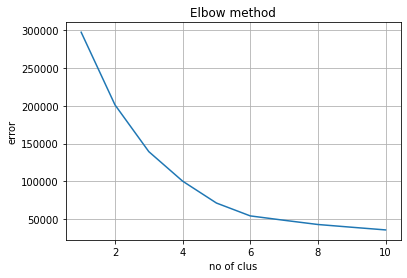

In [21]:
import matplotlib.pyplot as plt
plt.plot(range(1,11),error)
plt.title('Elbow method')
plt.xlabel('no of clus')
plt.ylabel('error')
plt.grid()
plt.show()

In [22]:
km = KMeans(n_clusters=5)
clusters = km.fit_predict(new_data)
clusters

array([4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3], dtype=int32)

In [23]:
#10. Add the cluster data with the primary dataset
new_data["clusters"] = clusters
new_data.head()

,Gender,Age,Annual_Income,Spending_Score,clusters
0,1,19,15.0,39,4
1,1,21,15.0,81,1
2,0,20,16.0,6,4
3,0,23,16.0,77,1
4,0,31,17.0,40,4


In [24]:
#11.Split the data into dependent and independent variables.

#dependent variable

y = new_data["clusters"] 

#independent variables

x = new_data.drop(columns = ['clusters'], axis = 1) 

,Gender,Age,Annual_Income,Spending_Score
0,1,19,15.00,39
1,1,21,15.00,81
2,0,20,16.00,6
3,0,23,16.00,77
4,0,31,17.00,40
...,...,...,...,...
195,0,35,120.00,79
196,0,45,126.00,28
197,1,32,126.00,74
198,1,32,60.56,18


In [25]:
#12.Split the data into training and testing.

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [26]:
print(f"shape of X_train : {X_train.shape}")
print(f"shape of X_test : {X_test.shape}")
print(f"shape of y_train : {y_train.shape}")
print(f"shape of y_test : {y_test.shape}")

shape of X_train : (140, 4)
shape of X_test : (60, 4)
shape of y_train : (140,)
shape of y_test : (60,)


In [30]:
#13. Build the model
from sklearn.tree import DecisionTreeClassifier
model =DecisionTreeClassifier()

In [31]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [34]:
#14.Train the model
predictions= model.predict(X_train)
predictions

array([3, 2, 3, 1, 3, 2, 2, 3, 2, 2, 3, 2, 3, 2, 0, 2, 2, 4, 1, 3, 3, 2,
       0, 3, 2, 2, 4, 2, 0, 3, 1, 4, 0, 2, 0, 0, 3, 0, 2, 2, 0, 3, 2, 4,
       2, 2, 2, 2, 3, 1, 2, 2, 2, 2, 1, 3, 1, 0, 3, 4, 1, 2, 2, 2, 2, 2,
       1, 2, 0, 0, 4, 2, 2, 2, 3, 3, 0, 2, 3, 1, 2, 2, 1, 2, 2, 1, 2, 0,
       4, 2, 0, 3, 1, 4, 3, 2, 3, 0, 4, 4, 2, 3, 1, 0, 3, 0, 4, 0, 3, 3,
       1, 2, 2, 2, 2, 0, 3, 2, 2, 1, 3, 2, 0, 0, 0, 1, 2, 0, 2, 2, 2, 4,
       1, 1, 2, 2, 0, 2, 2, 0], dtype=int32)

In [44]:
#15.Test the model
predictions = model.predict(X_test)
predictions

array([4, 0, 2, 2, 3, 0, 1, 0, 4, 0, 2, 3, 0, 0, 2, 1, 1, 0, 1, 2, 3, 3,
       1, 3, 2, 3, 3, 3, 2, 4, 4, 2, 0, 2, 4, 3, 3, 4, 2, 2, 0, 2, 4, 2,
       0, 2, 4, 2, 2, 3, 2, 0, 0, 2, 3, 4, 4, 0, 4, 2], dtype=int32)

In [52]:
train_pred = model.predict(X_train)
train_pred

array([3, 2, 3, 1, 3, 2, 2, 3, 2, 2, 3, 2, 3, 2, 0, 2, 2, 4, 1, 3, 3, 2,
       0, 3, 2, 2, 4, 2, 0, 3, 1, 4, 0, 2, 0, 0, 3, 0, 2, 2, 0, 3, 2, 4,
       2, 2, 2, 2, 3, 1, 2, 2, 2, 2, 1, 3, 1, 0, 3, 4, 1, 2, 2, 2, 2, 2,
       1, 2, 0, 0, 4, 2, 2, 2, 3, 3, 0, 2, 3, 1, 2, 2, 1, 2, 2, 1, 2, 0,
       4, 2, 0, 3, 1, 4, 3, 2, 3, 0, 4, 4, 2, 3, 1, 0, 3, 0, 4, 0, 3, 3,
       1, 2, 2, 2, 2, 0, 3, 2, 2, 1, 3, 2, 0, 0, 0, 1, 2, 0, 2, 2, 2, 4,
       1, 1, 2, 2, 0, 2, 2, 0], dtype=int32)

In [55]:
#15.Evaluating the model
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print('Training accuracy: ', accuracy_score(y_train,train_pred))
print('Testing accuracy: ', accuracy_score(y_test,predictions))


Training accuracy:  1.0
Testing accuracy:  1.0


In [57]:
pd.crosstab(y_test,predictions)

col_0,0,1,2,3,4
clusters,,,,,
0,13,0,0,0,0
1,0,5,0,0,0
2,0,0,19,0,0
3,0,0,0,12,0
4,0,0,0,0,11


In [58]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00        19
           3       1.00      1.00      1.00        12
           4       1.00      1.00      1.00        11

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60

